<a href="https://colab.research.google.com/github/ukablahblah/MAT-421/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, dsolve, Eq, Derivative, exp

# Section 1: Initial Value Problem (IVP)
"""
## 1. Initial Value Problem (IVP)
An Initial Value Problem (IVP) for an Ordinary Differential Equation (ODE) consists of:
- A differential equation \( y'(x) = f(x, y) \)
- An initial condition \( y(x_0) = y_0 \)

### Example:
Solve the first-order ODE \( \frac{dy}{dx} = -2y \) with the initial condition \( y(0) = 1 \).
"""

x, C1 = symbols('x C1')
y = Function('y')(x)

# Define the differential equation
de = Eq(Derivative(y, x), -2*y)

# Solve the ODE
solution = dsolve(de, y)

# Apply the initial condition y(0) = 1
C1_value = solution.subs(x, 0).rhs.subs(y, 1)
solution_with_ic = solution.subs(C1, C1_value)

print("General Solution:", solution)
print("Solution with Initial Condition y(0) = 1:", solution_with_ic)



General Solution: Eq(y(x), C1*exp(-2*x))
Solution with Initial Condition y(0) = 1: Eq(y(x), C1*exp(-2*x))


In [4]:
# Section 2: Reduction of Order
"""
## 2. Reduction of Order Method
Reduction of Order is used to find a second linearly independent solution when one solution is known.

Given a second-order linear ODE:
\[
 y'' + p(x) y' + q(x) y = 0
\]
and a known solution \( y_1(x) \), we assume a second solution of the form \( y_2(x) = v(x) y_1(x) \) and solve for \( v(x) \).

### Example:
Find a second solution for \( y'' - y = 0 \) given that \( y_1 = e^x \).
"""

v = Function('v')(x)
y1 = exp(x)  # Corrected from np.exp(x) to sympy.exp(x)

# Assume y2 = v * y1 and compute derivatives
y2 = v * y1
y2_prime = v.diff(x) * y1 + v * y1
y2_double_prime = v.diff(x, x) * y1 + 2 * v.diff(x) * y1 + v * y1

# Substitute into ODE
de_reduction = Eq(y2_double_prime - y2, 0)

print("Reduction of Order ODE:", de_reduction)



Reduction of Order ODE: Eq(2*exp(x)*Derivative(v(x), x) + exp(x)*Derivative(v(x), (x, 2)), 0)


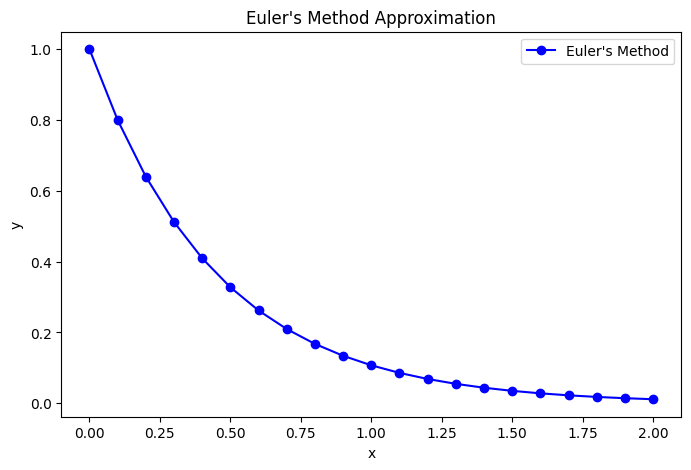

In [5]:
# Section 3: Euler's Method
"""
## 3. Euler's Method
Euler's method is a numerical technique for solving ODEs of the form:
\[
 y_{n+1} = y_n + h f(x_n, y_n)
\]
where \( h \) is the step size.

### Example:
Solve \( \frac{dy}{dx} = -2y \) with \( y(0) = 1 \) using Euler's method.
"""

def euler_method(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]

    for _ in range(n):
        y_next = y_values[-1] + h * f(x_values[-1], y_values[-1])
        x_next = x_values[-1] + h
        x_values.append(x_next)
        y_values.append(y_next)

    return np.array(x_values), np.array(y_values)

# Define ODE
def f(x, y):
    return -2 * y

# Parameters
x0, y0 = 0, 1  # Initial condition
h = 0.1  # Step size
n = 20  # Number of steps

# Solve using Euler's method
x_vals, y_vals = euler_method(f, x0, y0, h, n)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, 'bo-', label="Euler's Method")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Euler's Method Approximation")
plt.legend()
plt.show()
